Visualizing clusters in a two- or three-dimensional space gives more intuitive information to the observer in terms of the location of the data points in the feature space and the segregation and aggregation of these data points. The visualization usually consists of the location of a data point along the feature axis. Another interesting plot for clustering is the silhouette plot, which depicts the quality of clustering. In this recipe, we work on a few types of visualizations of the clusters in k-means as we have already seen the visualization specific to hierarchical clustering.

在二维或三维空间中可视化聚类，在特征空间中数据点的位置以及这些数据点的分离和聚集方面，可以为观察者提供更直观的信息。可视化通常包括沿特征轴的数据点的位置。聚类的另一个有趣的图是剪影图，它描述了聚类的质量。在这个菜谱中，我们使用k-means对集群进行了几种可视化，因为我们已经看到了特定于分层集群的可视化。

1. Create a simple plot of obtained clusters, plot the data against the clusters, and color the points based on the clusters that they are put into as follows:

 创建一个简单的聚类图，根据聚类绘制数据，并根据它们被放入的聚类对这些点进行着色，如下所示:

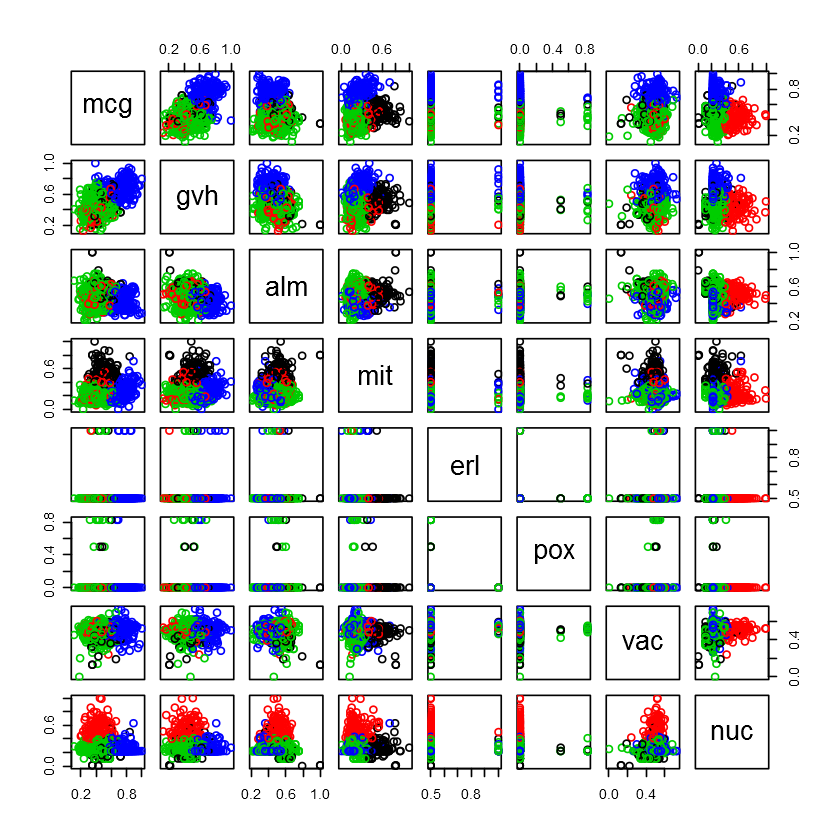

In [1]:
yeast= read.table("yeast.txt",header=TRUE, sep="\t")
myData <- yeast[,2:9]
k <- 4
kmeans_result <- kmeans(myData, k)
plot(myData, col = kmeans_result$cluster)

2. To perform shading on the clustering area, use the fpc package and shade the areas with corresponding colors, as follows

 要对集群区域执行阴影处理，请使用fpc包并使用相应的颜色对区域进行阴影处理，如下所示：

In [2]:
install.packages("fpc")

also installing the dependencies 'modeltools', 'flexmix', 'prabclus', 'diptest', 'trimcluster'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'modeltools' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'trimcluster' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp4UhD31\downloaded_packages


In [3]:
library(fpc)

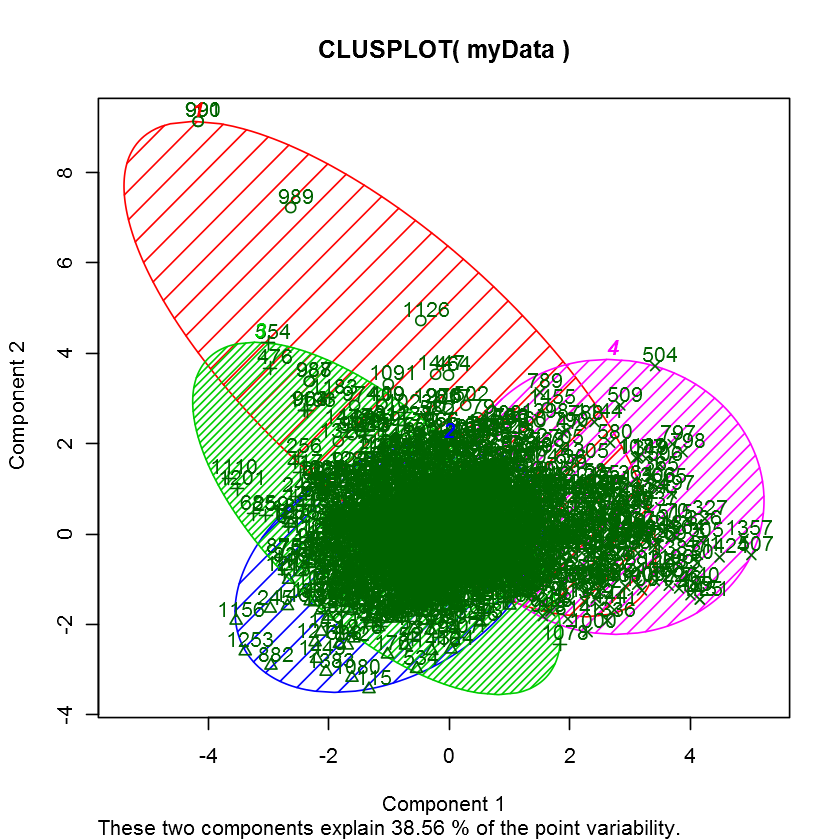

In [4]:
library(cluster)
clusplot(myData, kmeans_result$cluster, color=T, shade=T,labels=2, lines=0)

3. To look at the centroid positions together with the data is a bit complicated. However, this can be achieved in the following way and requires the given vegan library：

 把质心位置和数据一起看有点复杂。然而，这可以通过以下方式实现，并且需要给定的纯素库:

In [5]:
install.packages("vegan")

also installing the dependency 'permute'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'permute' successfully unpacked and MD5 sums checked
package 'vegan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp4UhD31\downloaded_packages


In [6]:
library(vegan)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2


4. Now, assign the groups as the levels in the cluster results as follows:

 将组分配为集群结果中的级别，如下所示

In [7]:
groups <- levels(factor(kmeans_result$cluster))

5. After this, initialize a plot with the following command:

 初始化绘图:

species scores not available


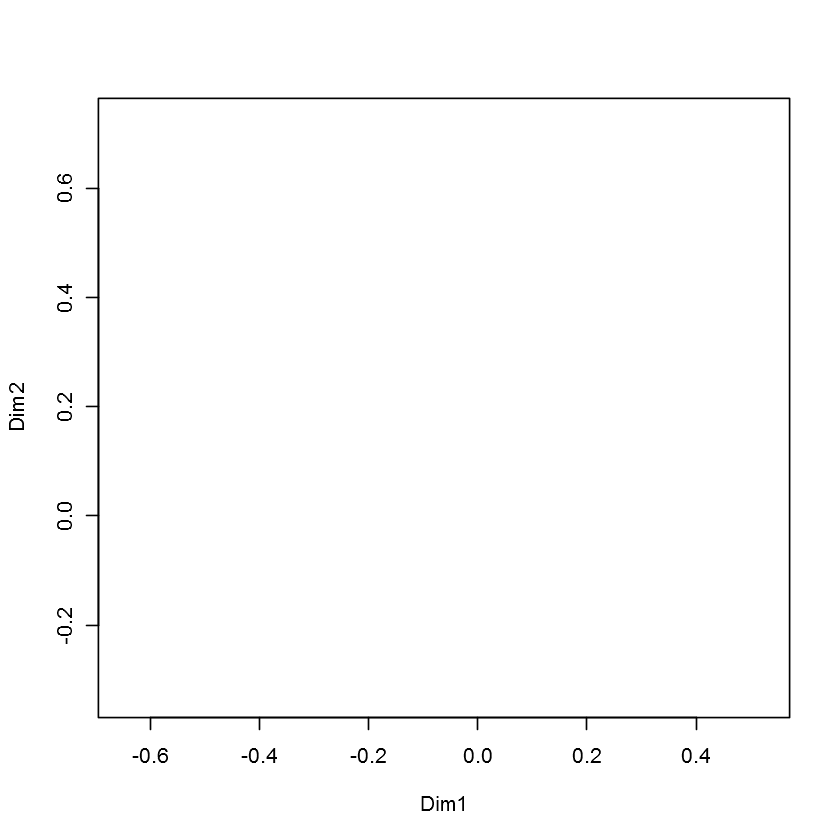

In [8]:
ordiplot(cmdscale(dist(myData)), type = "n") # might issue a warning

6. Assign the colors to each cluster in the results, as follows:

 为结果中的每个集群分配颜色：

In [9]:
cols <- rainbow(nlevels(factor(kmeans_result$cluster)))

7. Now, plot each data point within the initialized plot as follows:

 将初始化后的图中的每个数据点绘制如下图所示：

species scores not available


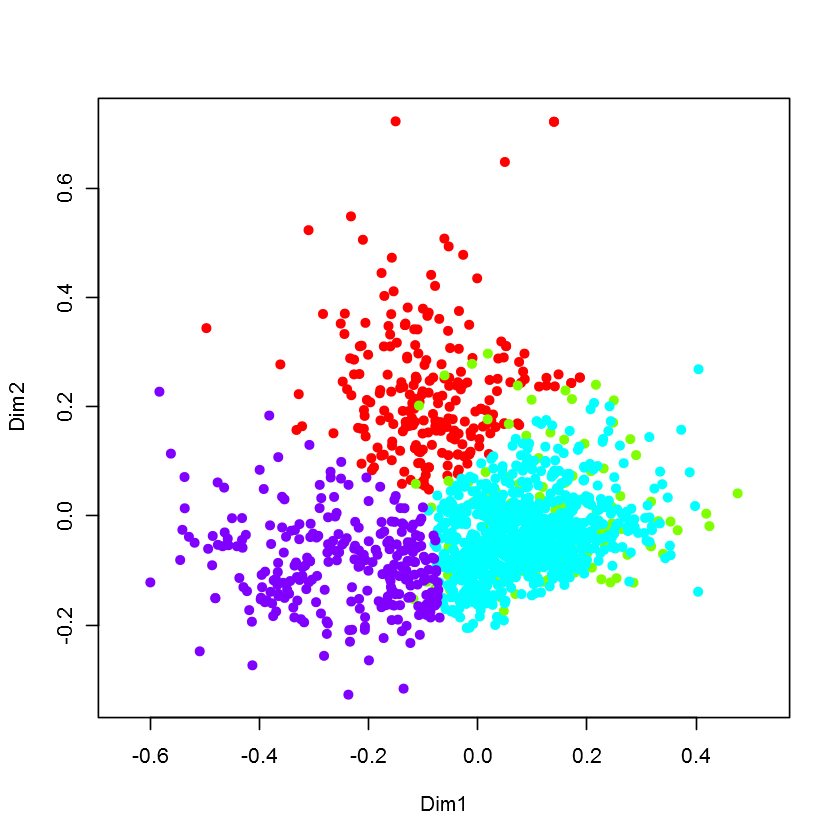

In [11]:
ordiplot(cmdscale(dist(myData)), type = "n") # might issue a warning
for(i in seq_along(groups)) {
points(cmdscale(dist(myData))[factor(kmeans_result$cluster) ==
groups[i], ], col = cols[i], pch = 16)
}

8. Then, add the spider web for each data point on the plot as follows:

 图中的每个数据点添加蜘蛛网:

species scores not available


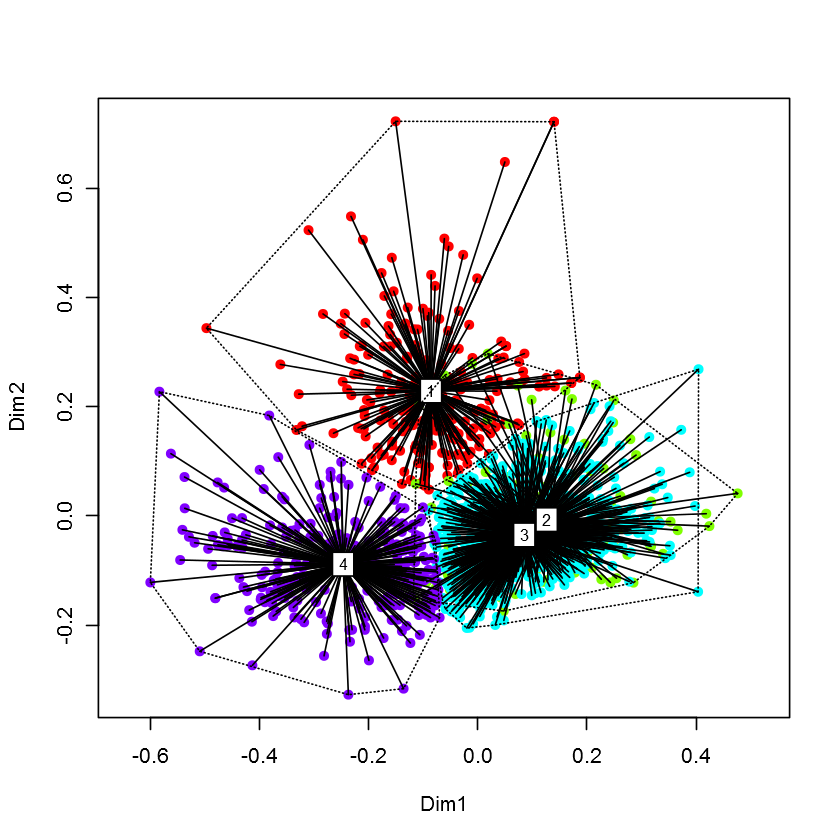

In [13]:
ordiplot(cmdscale(dist(myData)), type = "n") # might issue a warning
for(i in seq_along(groups)) {
points(cmdscale(dist(myData))[factor(kmeans_result$cluster) ==
groups[i], ], col = cols[i], pch = 16)
}
ordispider(cmdscale(dist(myData)), factor(kmeans_result$cluster), label = TRUE)
ordihull(cmdscale(dist(myData)), factor(kmeans_result$cluster),lty = "dotted")